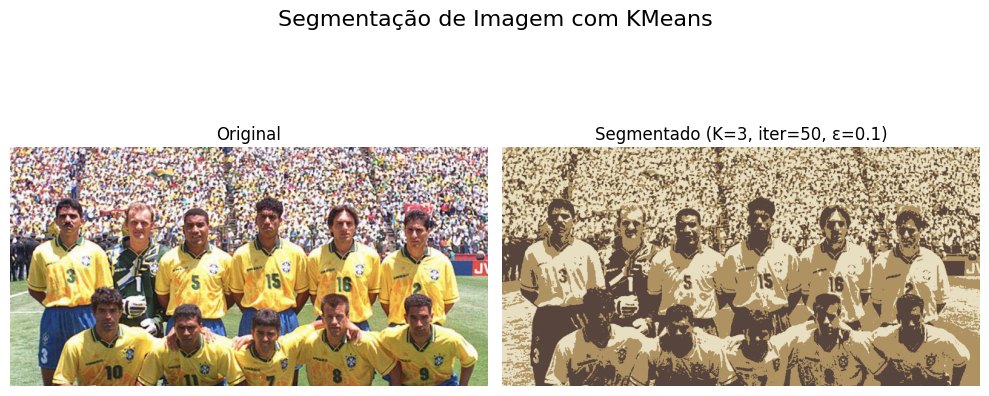

>>> Segmentação salva em 'segmented_K3.png'

=== Resultados de Clusterização ===
➤ K = 2: Silhouette Score = 0.4360
    Centróides (Idade, Salário):
      - Cluster 1: (Idade ≈ 60.2, Salário ≈ R$ 25,083.30)
      - Cluster 2: (Idade ≈ 37.4, Salário ≈ R$ 65,568.62)

➤ K = 3: Silhouette Score = 0.4273
    Centróides (Idade, Salário):
      - Cluster 1: (Idade ≈ 79.5, Salário ≈ R$ 66,576.00)
      - Cluster 2: (Idade ≈ 31.7, Salário ≈ R$ 62,321.86)
      - Cluster 3: (Idade ≈ 57.8, Salário ≈ R$ 22,886.33)

➤ K = 4: Silhouette Score = 0.3725
    Centróides (Idade, Salário):
      - Cluster 1: (Idade ≈ 32.8, Salário ≈ R$ 67,787.83)
      - Cluster 2: (Idade ≈ 69.3, Salário ≈ R$ 27,409.33)
      - Cluster 3: (Idade ≈ 77.0, Salário ≈ R$ 88,296.00)
      - Cluster 4: (Idade ≈ 42.2, Salário ≈ R$ 23,180.60)

➤ K = 5: Silhouette Score = 0.3306
    Centróides (Idade, Salário):
      - Cluster 1: (Idade ≈ 51.7, Salário ≈ R$ 10,845.33)
      - Cluster 2: (Idade ≈ 33.2, Salário ≈ R$ 71,948.40)
      

In [21]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -------------------------------
# 1) Segmentação da imagem com KMeans
# -------------------------------

# Parâmetros
K = 3
MAX_ITER = 50
EPS = 0.1
ATTEMPTS = 10

# Carregar imagem
img = cv2.imread('Selecao.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preparar pixels
pixels = img_rgb.reshape((-1, 3)).astype(np.float32)

# Critério de parada
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, MAX_ITER, EPS)

# Executar KMeans
ret, labels, centers = cv2.kmeans(
    pixels, K, None, criteria, ATTEMPTS, cv2.KMEANS_RANDOM_CENTERS
)

# Recuperar imagem segmentada
centers = np.uint8(centers)
segmented = centers[labels.flatten()].reshape(img_rgb.shape)

# Exibir resultados da segmentação
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title(f"Segmentado (K={K}, iter={MAX_ITER}, ε={EPS})")
plt.axis('off')

plt.suptitle("Segmentação de Imagem com KMeans", fontsize=16)
plt.tight_layout()
plt.show()

# Salvar resultado
cv2.imwrite('segmented_K3.png', cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))
print(">>> Segmentação salva em 'segmented_K3.png'")

# -------------------------------
# 2) Agrupamento dos dados de salário
# -------------------------------

# Carregar e limpar CSV
df = pd.read_csv('KMeans_Salario.csv', sep=';')
df['Salário Mensal'] = (
    df['Salário Mensal']
    .str.replace(r'[R$\s]', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Selecionar features
X = df[['Idade', 'Salário Mensal']].values

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Avaliar K de 2 a 10 via Silhouette Score
best_k = None
best_score = -1
centroids_dict = {}

print("\n=== Resultados de Clusterização ===")
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = km.fit_predict(X_scaled)
    centroids = scaler.inverse_transform(km.cluster_centers_)
    centroids_dict[k] = centroids

    score = silhouette_score(X_scaled, labels)
    print(f"➤ K = {k}: Silhouette Score = {score:.4f}")
    print(f"    Centróides (Idade, Salário):")
    for idx, (idade_cent, salario_cent) in enumerate(centroids, start=1):
        print(f"      - Cluster {idx}: (Idade ≈ {idade_cent:.1f}, Salário ≈ R$ {salario_cent:,.2f})")
    print()

    if score > best_score:
        best_score = score
        best_k = k

print(f"⇒ Melhor número de clusters: K = {best_k} (Silhouette = {best_score:.4f})")
